In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/matteo/Documents/PersonalProjects/airbnb-pricing-optimization/data/listings-1.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7780 non-null   int64  
 1   name                            7780 non-null   object 
 2   host_id                         7780 non-null   int64  
 3   host_name                       7779 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7780 non-null   object 
 6   latitude                        7780 non-null   float64
 7   longitude                       7780 non-null   float64
 8   room_type                       7780 non-null   object 
 9   price                           5795 non-null   float64
 10  minimum_nights                  7780 non-null   int64  
 11  number_of_reviews               7780 non-null   int64  
 12  last_review                     59

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.780000e+03,7.780000e+03,0.0,7780.000000,7780.000000,5795.000000,7780.000000,7780.000000,5910.000000,7780.000000,7780.000000,7780.000000
mean,5.423931e+17,1.949055e+08,NaN,37.770925,-122.429149,378.924245,19.860925,52.701414,1.245953,23.398201,189.690746,8.680848
std,5.626811e+17,2.162753e+08,NaN,0.023160,0.026895,2440.019980,48.255644,113.273945,1.997823,55.423629,132.339903,21.674254
min,9.580000e+02,1.169000e+03,NaN,37.708480,-122.512460,29.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.826221e+07,1.041522e+07,NaN,37.755847,-122.441104,105.000000,2.000000,1.000000,0.160000,1.000000,58.000000,0.000000
50%,5.743371e+17,9.089162e+07,NaN,37.776829,-122.421594,170.000000,3.000000,7.000000,0.470000,3.000000,214.000000,1.000000
75%,1.074843e+18,3.907730e+08,NaN,37.788415,-122.410430,285.000000,30.000000,46.000000,1.660000,15.000000,313.000000,7.000000
max,1.499678e+18,7.160698e+08,NaN,37.810940,-122.366040,50000.000000,1125.000000,1417.000000,49.890000,264.000000,365.000000,950.000000


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,157.0,2,496,2025-08-16,2.53,1,224,41,STR-0006854
1,5858,Creative Sanctuary,8904,Philip Jonathon,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,250.0,30,105,2017-08-06,0.53,1,357,0,NaN
2,8014,female HOST quiet fast internet market parking,22402,Jia,NaN,Outer Mission,37.73077,-122.44827,Private room,67.0,4,90,2025-07-03,0.57,3,42,1,STR-0000974
3,8142,*FriendlyRoom Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56.0,32,10,2023-07-30,0.07,20,362,0,NaN
4,8339,Historic Alamo Square Victorian,24215,Rosmarie,NaN,Western Addition,37.77377,-122.43614,Entire home/apt,527.0,9,25,2019-06-28,0.13,1,327,0,STR-0000264


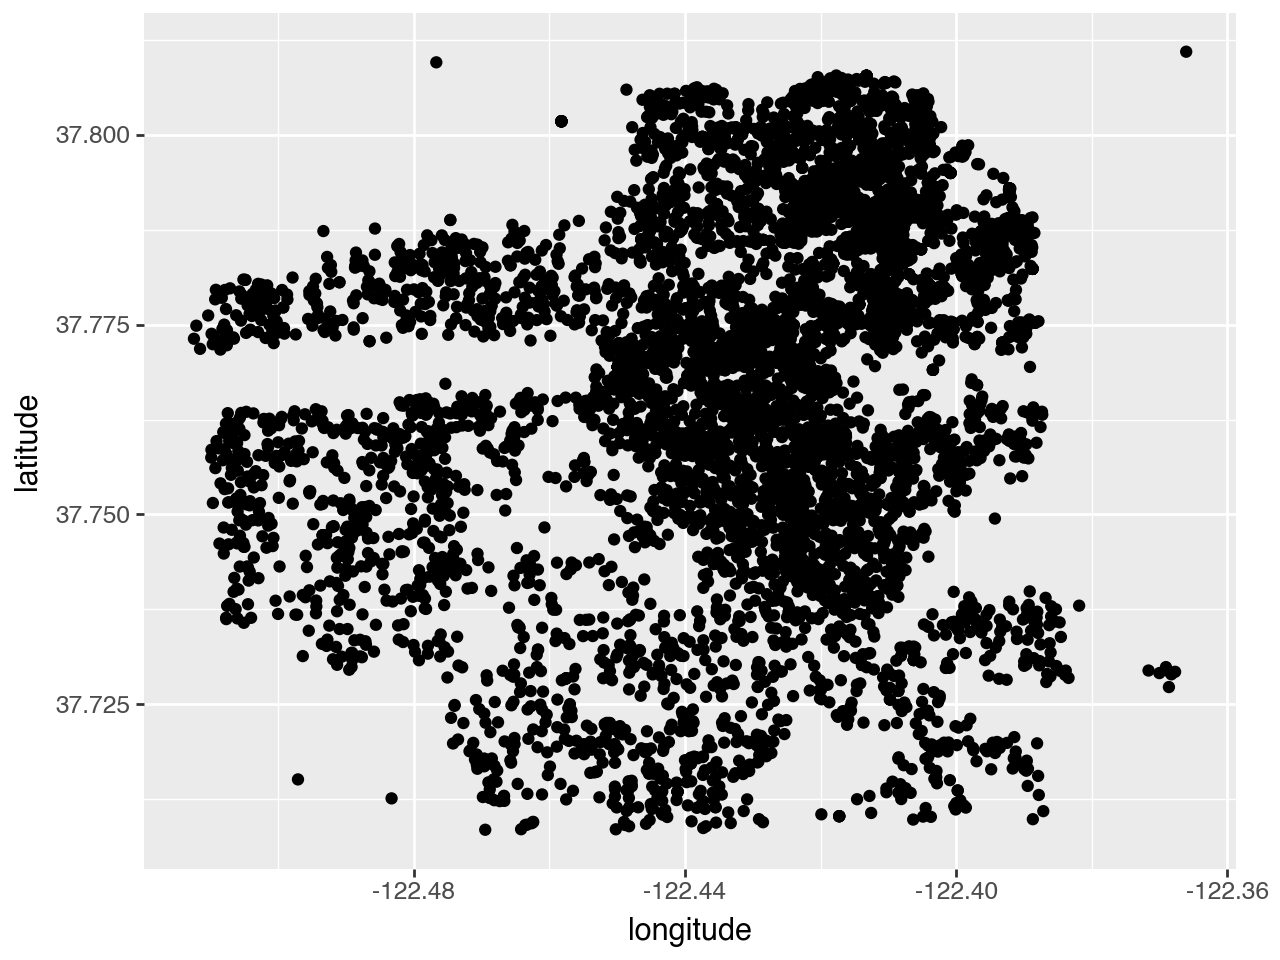

In [33]:
# recreation of the map, showing locations of each airbnb (not useful for now, just interesting)

(
    ggplot(df, mapping = aes(x = "longitude", y = "latitude")) +
    geom_point() 
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 236'. Pick better value with 'binwidth'.


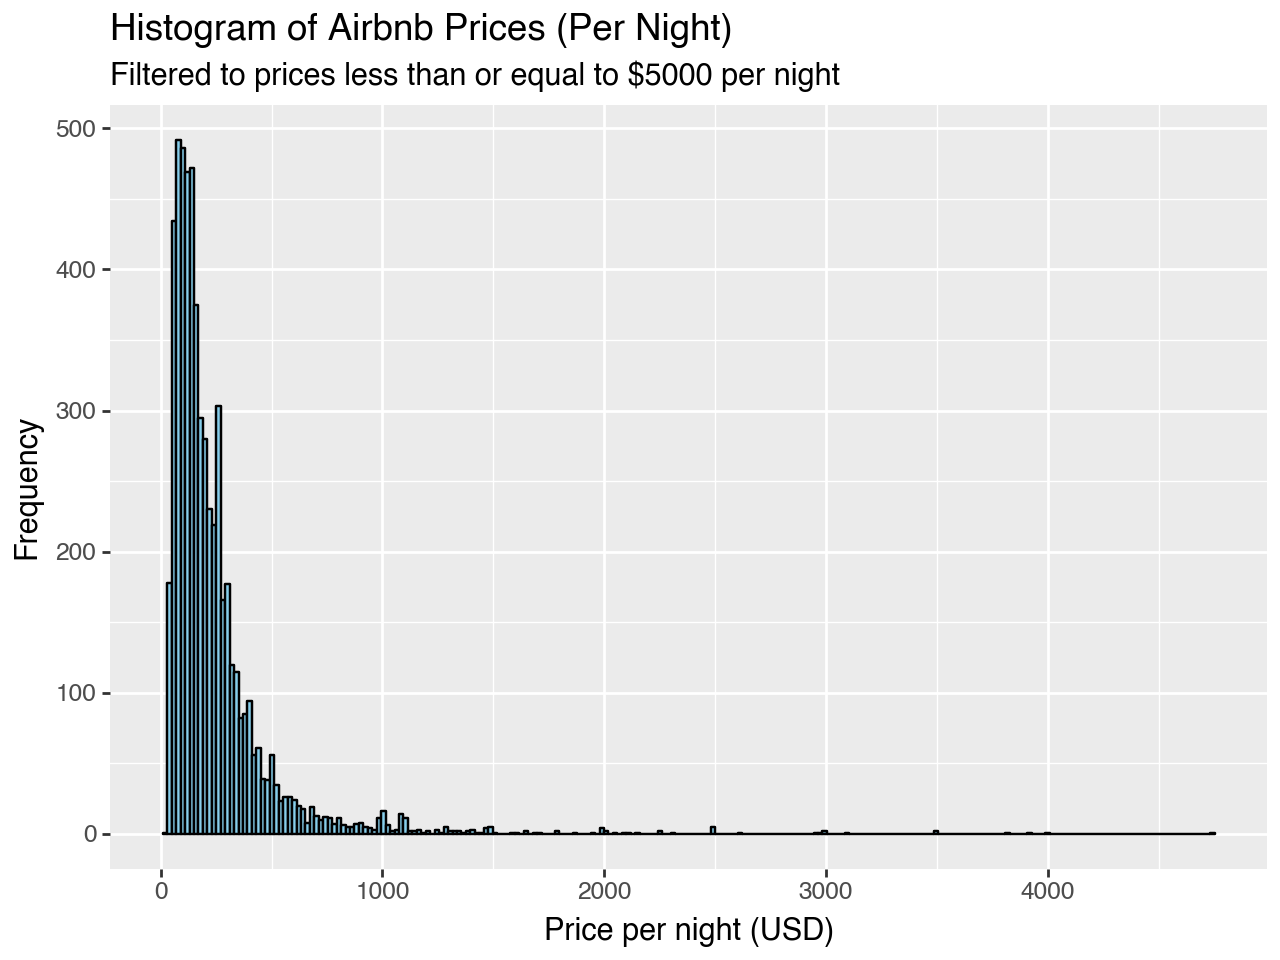

In [58]:
# histogram of prices less than or equal to $5000

(
    ggplot(df[df["price"] <= 5000], mapping = aes(x = "price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Prices (Per Night)",
         subtitle = "Filtered to prices less than or equal to $5000 per night",
         x = "Price per night (USD)",
         y = "Frequency")
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


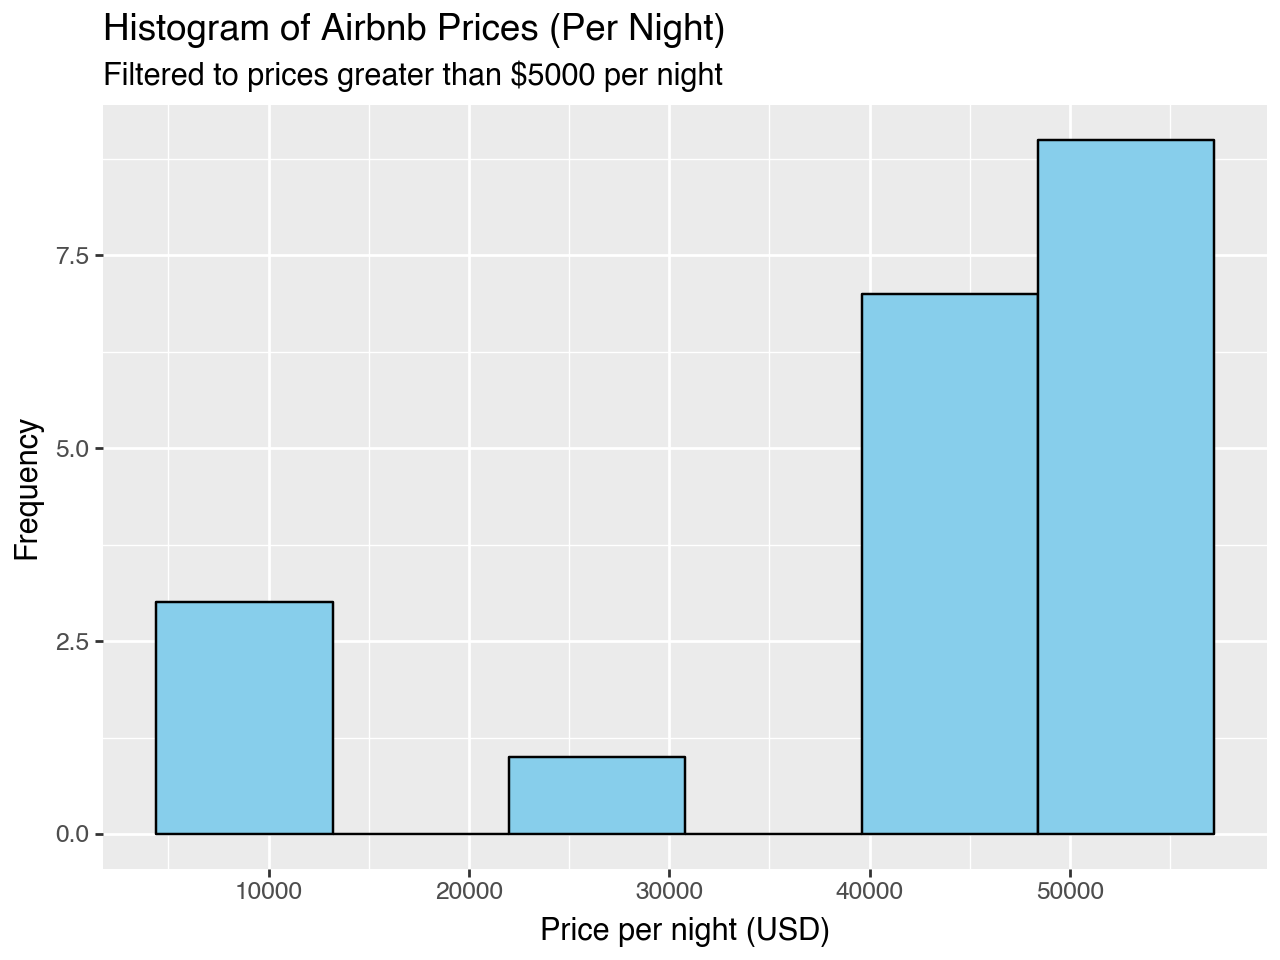

In [56]:
# Histogram of prices greater than $5000

(
    ggplot(df[df["price"] > 5000], mapping = aes(x = "price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Prices (Per Night)",
         subtitle = "Filtered to prices greater than $5000 per night",
         x = "Price per night (USD)",
         y = "Frequency")
)

In [7]:
# Check for outliers

Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

upper_bound = Q3 + (1.5 * (Q3 - Q1))

(df["price"] > upper_bound).value_counts()

price
False    7377
True      403
Name: count, dtype: int64

There are are 403 observations that are classified as outliers. I am going to label these as outliers for now, but keep them in the df. If it is favorable to remove them during model tuning, I will make a note.

In [9]:
# Create new variable which encodes each observation as an outlier if over the upper bound

df["is_outlier"] = (df["price"] > upper_bound)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 29'. Pick better value with 'binwidth'.


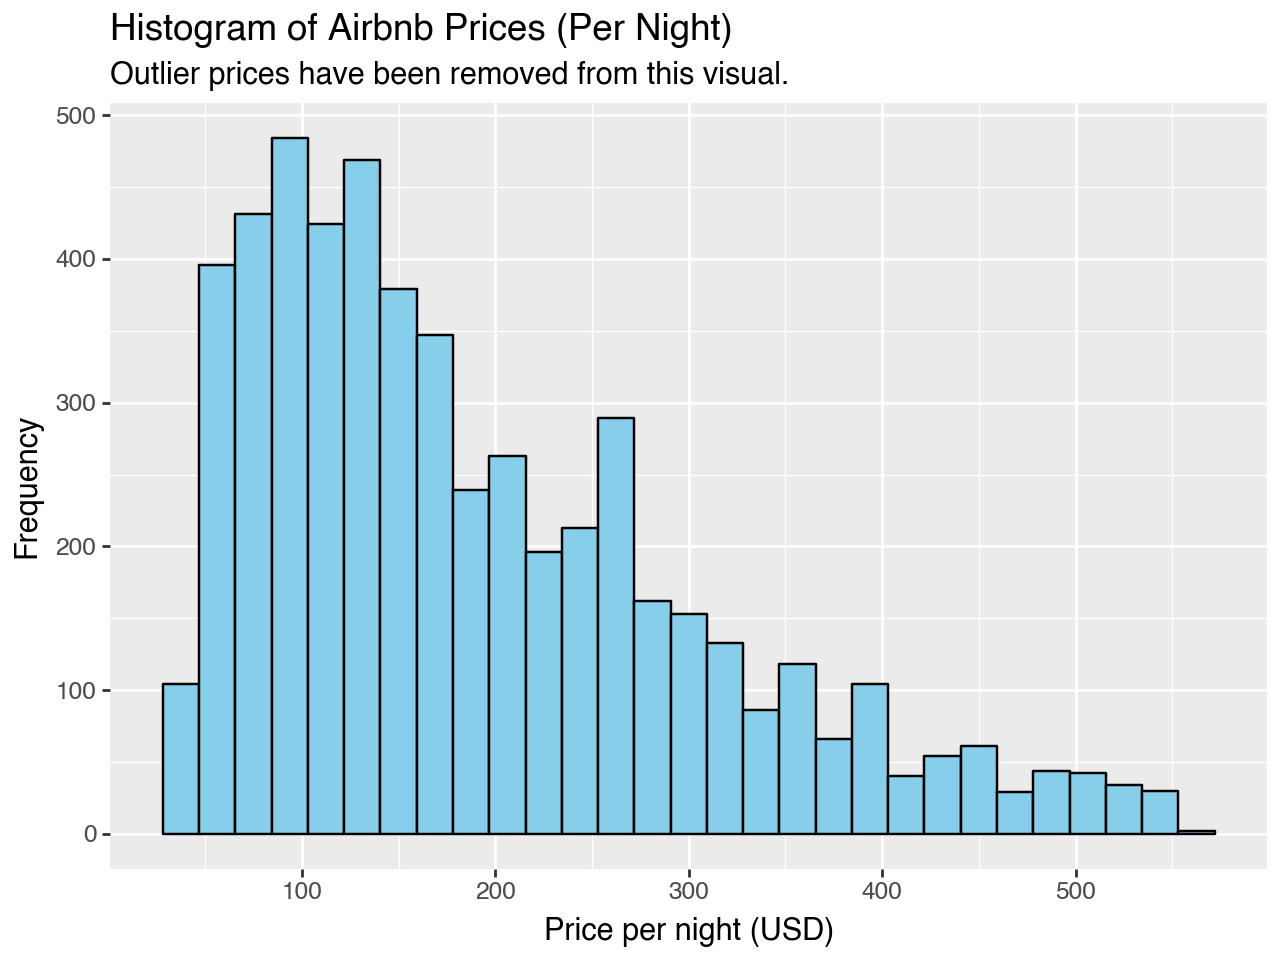

In [60]:
# Histogram with outliers removed, for reference

(
    ggplot(df[df["price"] < upper_bound], mapping = aes(x = "price")) +
    geom_histogram(color = "black", fill = "skyblue") +
    labs(title = "Histogram of Airbnb Prices (Per Night)",
         subtitle = "Outlier prices have been removed from this visual.",
         x = "Price per night (USD)",
         y = "Frequency")
)

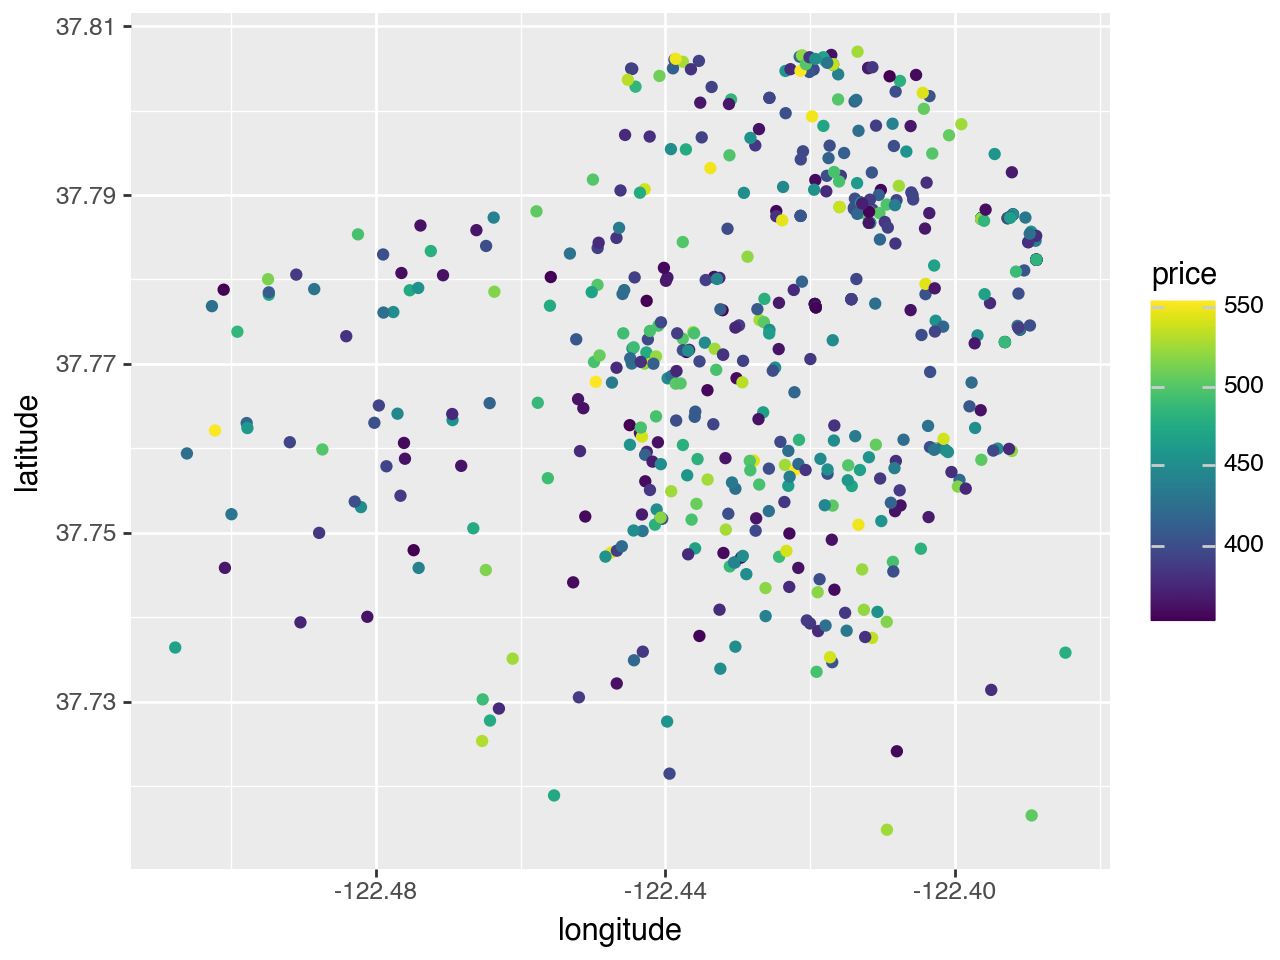

In [62]:
# Examining the relationship between price and location
# Outliers ommitted for this example, and filtered to prices greater than 350 to reduce clutter and focus on the higher prices

(
    ggplot(df[(df["is_outlier"] == False) & (df["price"] > 350)], mapping = aes(x = "longitude", y = "latitude", color = "price")) +
    geom_point()
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 1985 rows containing non-finite values.


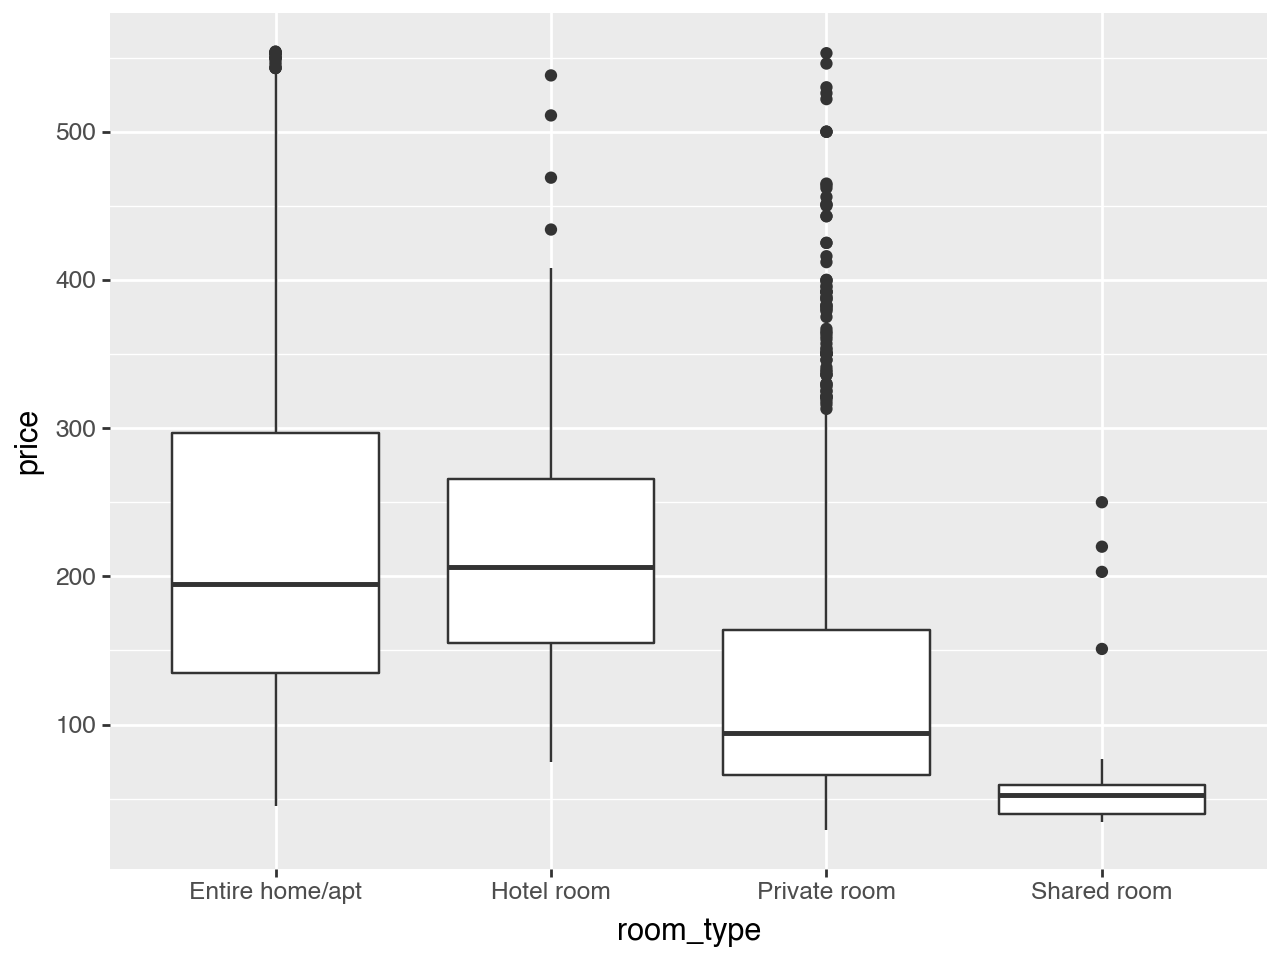

In [64]:
# explore room type and price 

(
    ggplot(df[df["is_outlier"] == False], mapping = aes(x = "room_type", y = "price")) +
    geom_boxplot()
)

/Users/matteo/opt/anaconda3/envs/airbnb/lib/python3.11/site-packages/plotnine/layer.py:374: PlotnineWarning: geom_point : Removed 539 rows containing missing values.


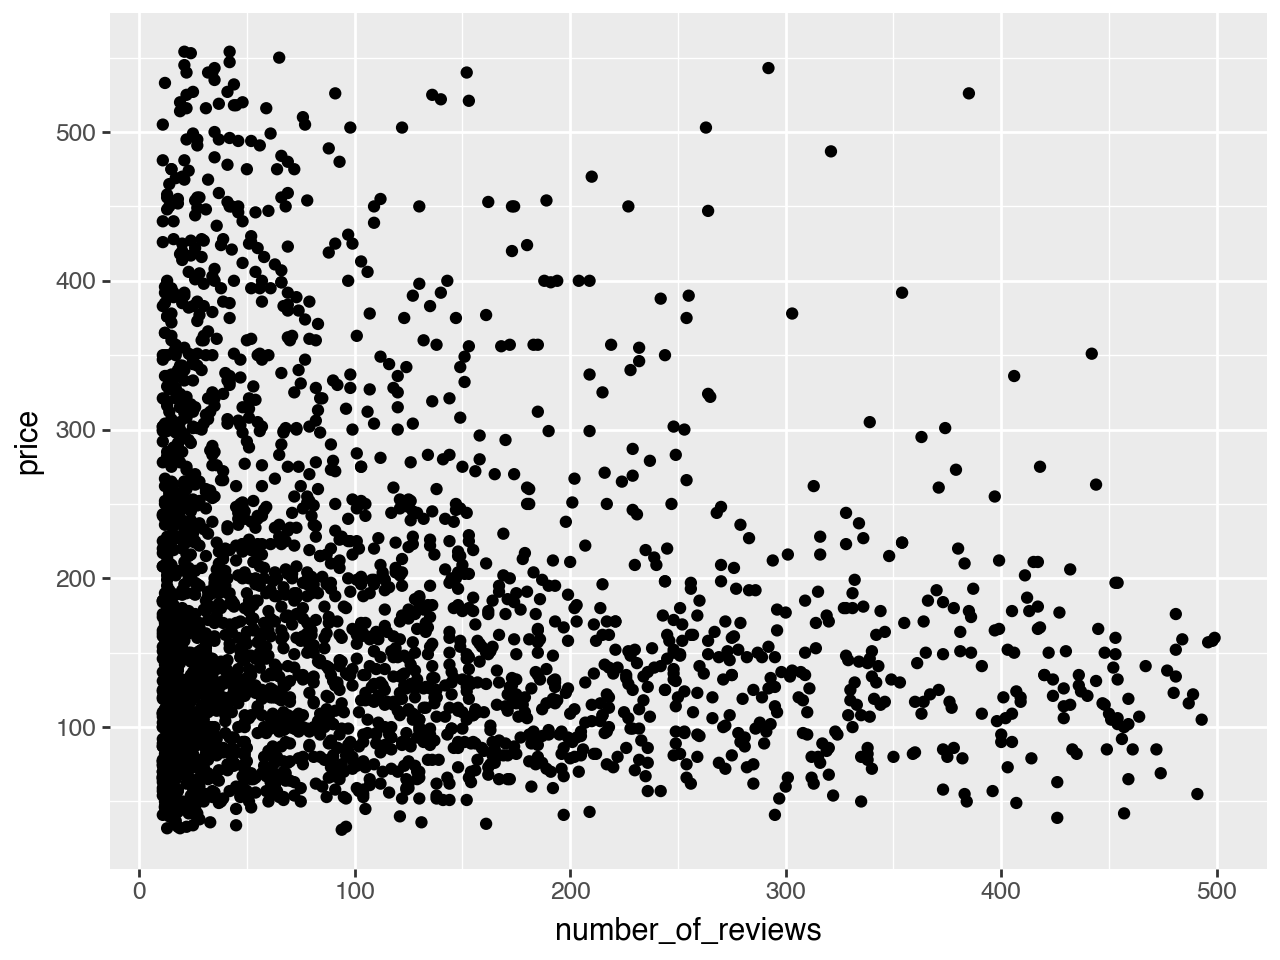

In [66]:
# Exploring relationship between number of reviews and price

(
    ggplot(df[(df["is_outlier"] == False) & (df["number_of_reviews"] < 500) & (df["number_of_reviews"] > 10)], mapping = aes(x = "number_of_reviews", y = "price")) +
    geom_point()
)